In [315]:
import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt

/Users/chia-hsinlin/opt/anaconda3/envs/api_test/lib/python3.9/site-packages/yahoo_fin/stock_info.py:29: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  end_seconds = int(pd.Timestamp(end_date).timestamp())


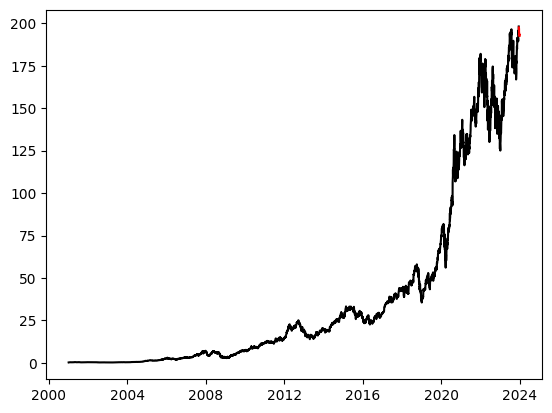

In [316]:
train_start_date = "01/01/2001"
train_end_date = "30/06/2023"
test_start_date = "01/07/2023"
test_end_date = "30/12/2023"
window = 20

df = si.get_data("AAPL", start_date=train_start_date, end_date=test_end_date)[["close"]]

plt.plot(df.iloc[:-10], color = "black")
plt.plot(df.iloc[-10:], color = "red")


In [317]:
# split data

train = df.iloc[:-10]
test = df.iloc[-10:]



,close,lag_1,return
2001-01-02,0.265625,NaN,NaN
2001-01-03,0.292411,0.265625,10.084141
2001-01-04,0.304688,0.292411,4.198545
2001-01-05,0.292411,0.304688,-4.029370
2001-01-08,0.295759,0.292411,1.144961
...,...,...,...
2023-12-08,195.710007,194.270004,0.741238
2023-12-11,193.179993,195.710007,-1.292736
2023-12-12,194.710007,193.179993,0.792015
2023-12-13,197.960007,194.710007,1.669149


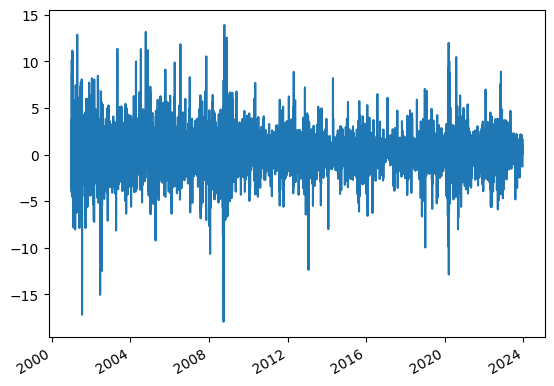

In [318]:
train = pd.concat([train]+[train.shift(1)], axis=1)
train.columns = ["close"] + ["lag_1"]

train["return"] = (train.close - train.lag_1)*100/train.lag_1
train["return"].plot()
train


In [319]:
X = train["return"][1:]
X

2001-01-03    10.084141
2001-01-04     4.198545
2001-01-05    -4.029370
2001-01-08     1.144961
2001-01-09     3.773681
                ...    
2023-12-08     0.741238
2023-12-11    -1.292736
2023-12-12     0.792015
2023-12-13     1.669149
2023-12-14     0.075770
Name: return, Length: 5774, dtype: float64

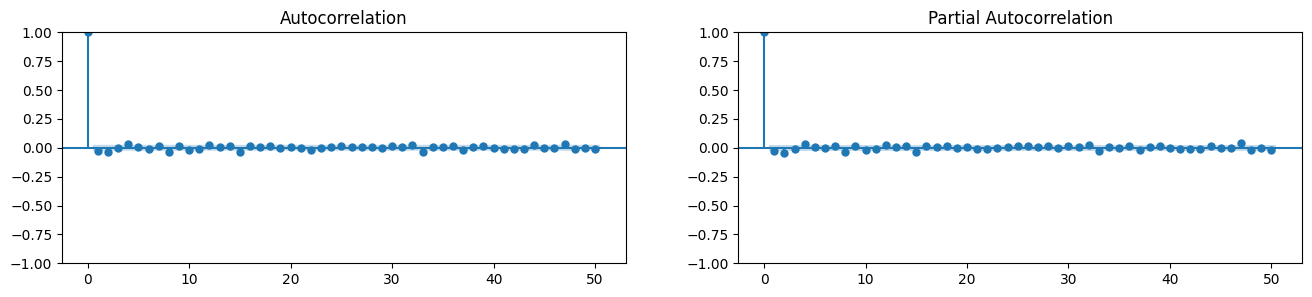

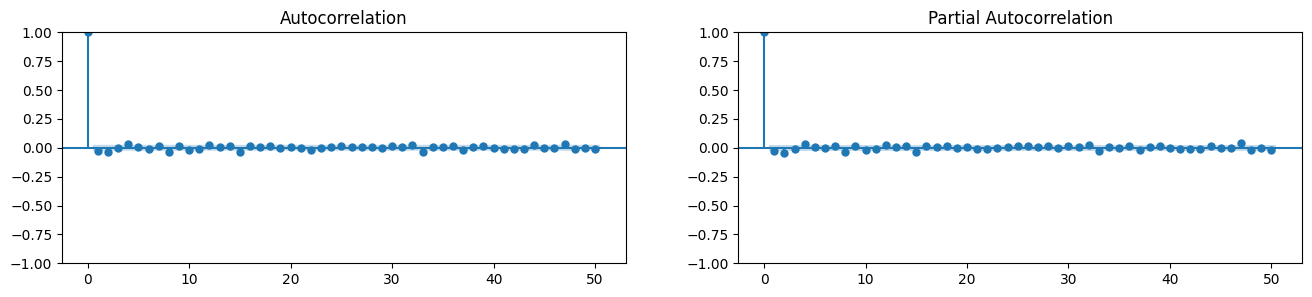

In [320]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(X, lags=50, ax=axes[0])
plot_pacf(X, lags=50, ax=axes[1])


In [321]:
from pmdarima.arima import auto_arima
model = auto_arima(X, start_p=1, start_q=1,
                      test='adf',
                      max_p=60, max_q=20,
                      m=0,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29914.892, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28308.828, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29912.893, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=27543.859, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=27044.484, Time=0.39 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=26797.657, Time=0.45 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=26646.491, Time=0.62 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=26505.423, Time=0.69 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=26462.922, Time=0.88 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=26369.192, Time=1.11 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=26329.367, Time=1.46 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=26290.769, Time=1.62 sec
 ARIMA(11,1,0)(0,0,0)[0] inter

In [322]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5774
Model:              SARIMAX(27, 1, 1)   Log Likelihood              -12877.750
Date:                Sun, 31 Dec 2023   AIC                          25813.500
Time:                        18:20:55   BIC                          26006.668
Sample:                             0   HQIC                         25880.712
                               - 5774                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0395      0.010     -4.148      0.000      -0.058      -0.021
ar.L2         -0.0541      0.011     -5.039      0.000      -0.075      -0.033
ar.L3         -0.0174      0.011     -1.591      0.112      -0.039       0.004
ar.L4          0.0205      0.011      1.841      0.066      -0.001       0.042
ar.L5         -0.0060      0.011     -0.561      0.575      -0.027       0.015
ar.L6         -0.0143      0.011     -1.358      0.175      -0.035       0.006
ar.L7          0.0021      0.011      0.190      0.849      -0.020       0.024
ar.L8         -0.0501      0.011     -4.687      0.000      -0.071      -0.029
ar.L9          0.0014      0.011      0.126      0.900      -0.020       0.023
ar.L10        -0.0280      0.010     -2.690      0.007      -0.048      -0.008
ar.L11        -0.0226      0.011     -2.060      0.039      -0.044      -0.001
ar.L12         0.0163      0.012      1.417      0.156      -0.006       0.039
ar.L13        -0.0041      0.011     -0.357      0.721      -0.026       0.018
ar.L14         0.0064      0.011      0.554      0.580      -0.016       0.029
ar.L15        -0.0431      0.011     -3.771      0.000      -0.066      -0.021
ar.L16         0.0056      0.011      0.529      0.597      -0.015       0.026
ar.L17        -0.0005      0.011     -0.044      0.965      -0.023       0.022
ar.L18         0.0044      0.011      0.393      0.694      -0.018       0.027
ar.L19        -0.0081      0.011     -0.729      0.466      -0.030       0.014
ar.L20        -0.0006      0.012     -0.055      0.956      -0.023       0.022
ar.L21        -0.0165      0.012     -1.356      0.175      -0.040       0.007
ar.L22        -0.0239      0.012     -1.959      0.050      -0.048     1.4e-05
ar.L23        -0.0121      0.012     -1.001      0.317      -0.036       0.012
ar.L24        -0.0027      0.012     -0.235      0.815      -0.026       0.020
ar.L25         0.0042      0.012      0.360      0.719      -0.019       0.027
ar.L26         0.0044      0.011      0.382      0.702      -0.018       0.027
ar.L27         0.0009      0.011      0.078      0.937      -0.021       0.022
ma.L1         -0.9809      0.004   -251.721      0.000      -0.989      -0.973
sigma2         5.0662      0.053     96.128      0.000       4.963       5.169
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              6003.97
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [323]:
# Forecast

print(len(test))
pred, confint = model.predict(n_periods=len(test), return_conf_int=True)
prediction = pd.DataFrame(pred.values)
prediction = prediction.set_index(test.index)
prediction.columns = ["pred_return"]
pred_value = [train.close[-1]]
for i in range(0,len(test)-1):
    pred_value.append(pred_value[-1]*prediction.pred_return[i+1]/100+pred_value[-1])
print(pred_value)
prediction["pred_value"] = pred_value



10
[198.11000061035156, 198.52290913948724, 198.79631869765936, 198.96371992205152, 199.44273825954951, 199.57317600756141, 199.99880202429762, 200.25732166699095, 200.57805336389117, 200.79879459112644]


/Users/chia-hsinlin/opt/anaconda3/envs/api_test/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/chia-hsinlin/opt/anaconda3/envs/api_test/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [324]:
prediction

,pred_return,pred_value
2023-12-15,-0.084249,198.110001
2023-12-18,0.208424,198.522909
2023-12-19,0.137722,198.796319
2023-12-20,0.084207,198.963720
2023-12-21,0.240757,199.442738
2023-12-22,0.065401,199.573176
2023-12-26,0.213268,199.998802
2023-12-27,0.129261,200.257322
2023-12-28,0.160160,200.578053
2023-12-29,0.110053,200.798795


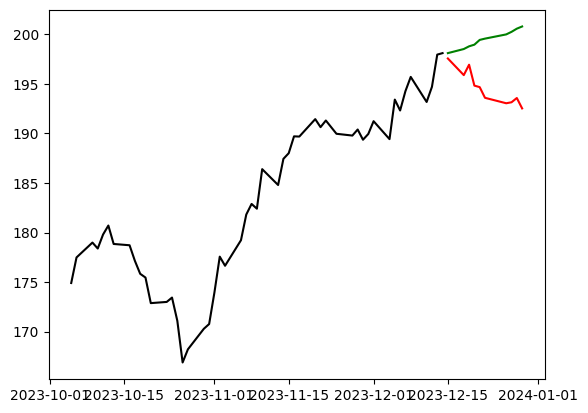

In [325]:
plt.plot(train["close"][-50:], color = "black")
plt.plot(test["close"], color = "red")
plt.plot(prediction.pred_value, color="green")
